# Image Processing: Dense Array, JPEG, PNG

> In this post, we will cover the basics of working with images in Matplotlib, OpenCV and Keras.
- toc: true 
- badges: true
- comments: true
- categories: [Image Processing, Computer Vision]
- image: images/freedom.png

Images are dense matrixes, and have a certain numbers of rows and columns. They can have 1 (grey) or 3 (RGB) or 4 (RGB + alpha-transparency) channels. 

The dimension of the image matrix is ( height, width, channels).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from sys import getsizeof
import tensorflow as tf

# 1. Load image files (*.jpg, *.png, *.bmp, *.tif)

   - ~~using PIL~~
   - using matplotlib: reads image as RGB
   - using cv2 :  reads image as BRG
   
   
  - imread: reads a file from disk and decodes it
  - imsave: encodes a image and writes it to a file on disk  

In [ ]:
#using PIL
#image = Image.open("images/freedom.png")
#plt.show(image)

#### Load image using Matplotlib
The Matplotlib image tutorial recommends using matplotlib.image.imread to read image formats from disk. This function will automatically change image array values to floats between zero and one, and it doesn't give any other options about how to read the image.

   - imshow works on 0-1 floats & 0-255 uint8 values
   - It doesn't work on int!

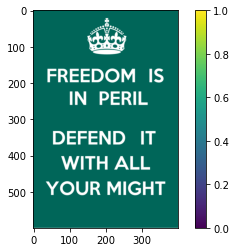

In [3]:
#using matplotlib.image
image = mpimg.imread("images/freedom.png")
#plt.imshow(image)
#plt.colorbar()

#### Load image using OpenCV

# 2. Image Processing

Storing one pixels takes several bytes.There are two main options for saving images: whether to lose some information while saving, or not. 

#### JPG format 

  - JPEG is lossy by deflaut

  - When saving an image as $*$.JPEG and read from it again, it is not necessary to get back the same values
  
  - The "image04_jpg.jpg" has 6.3 kB, less than the 7\% of $*$.npy file that generated it
  
  - cv2.IMWRITE_JPEG_QUALITY  is between (0, 100), and allows to save losseless

#### PNG format 

  - PNG is lossless

  - When saving an image as $*$.PNG and read from it again one gets the same value backs
  
  - cv2.IMWRITE_PNG_COMPRESSION is between (0, 1): bigger file, slower compression
  
  - freedom_png.png = 721.8 kB, close to freedomnpy 

References:

<https://planspace.org/20170403-images_and_tfrecords/>

<https://subscription.packtpub.com/book/application_development/9781788474443/1/ch01lvl1sec14/saving-images-using-lossy-and-lossless-compression>

<https://www.tensorflow.org/tutorials/load_data/tfrecord>

<https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/>